
Data Loading: Load the data from the CSV files.
Exploratory Data Analysis (EDA): Analyze the dataset to understand its characteristics.
Data Cleaning: Handle missing values and clean the data as necessary.
Feature Engineering: Create new features if needed.
Model Building: Train different regression models on the training data.
Model Evaluation: Evaluate the models using the Root Mean Squared Error (RMSE) metric.
Model Selection: Select the best performing model based on RMSE.
Prediction: Make predictions on the test dataset and prepare a submission file.
Improvement: Attempt to improve the model for better performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Load the training and test datasets
train_data_path = 'train.csv'
test_data_path = 'test.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Display the first few rows of the training data to understand its structure
train_df.head(), test_df.head()


(   id          brand              model  model_year  milage      fuel_type  \
 0   0           MINI      Cooper S Base        2007  213000       Gasoline   
 1   1        Lincoln              LS V8        2002  143250       Gasoline   
 2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
 3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
 4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   
 
                                               engine  \
 0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
 1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
 2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
 3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
 4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
 
                      transmission ext_col int_col  \
 0                             A/T  Yellow    Gray   
 1                             A/T  Silver   Beige   
 2                

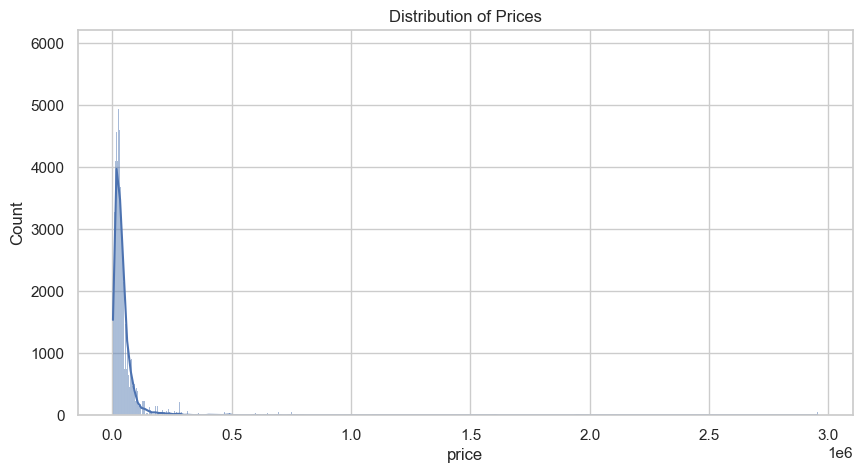

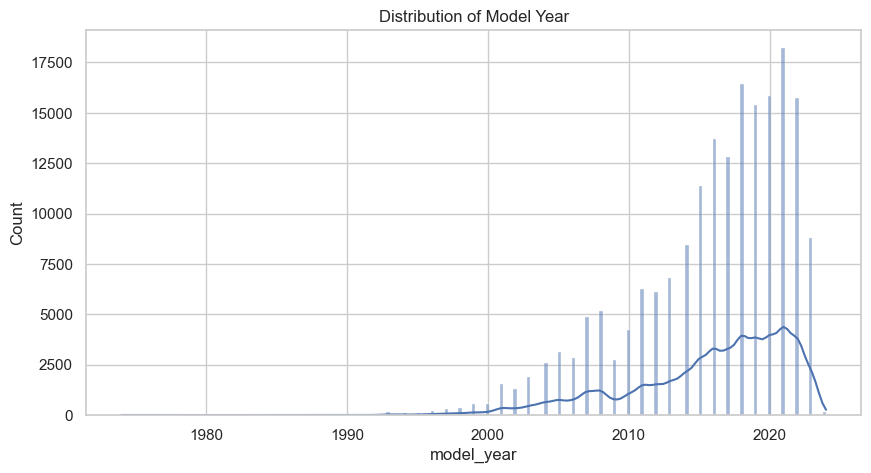

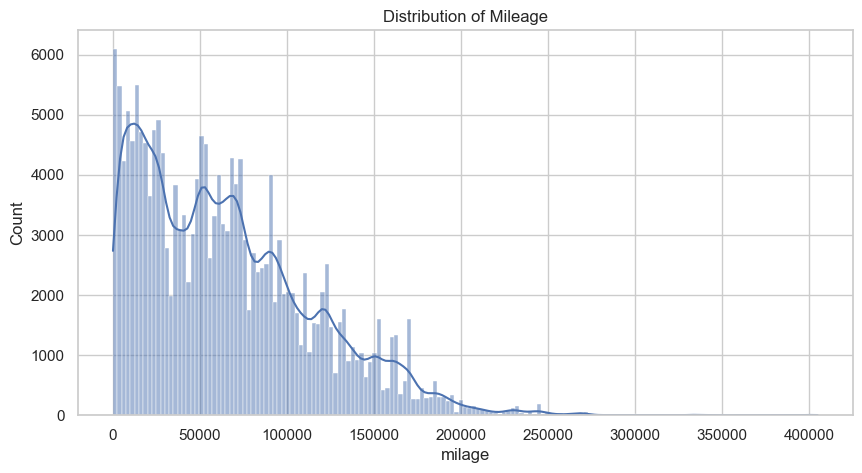

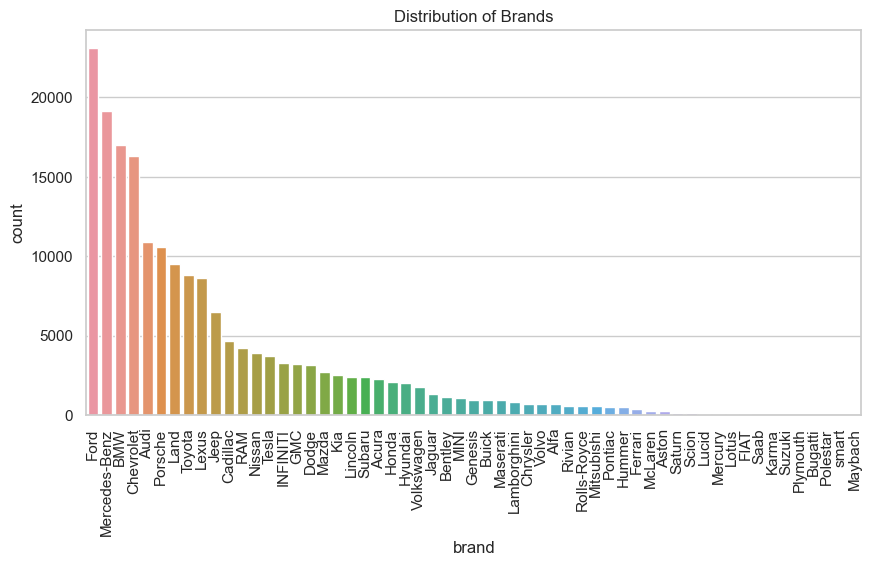

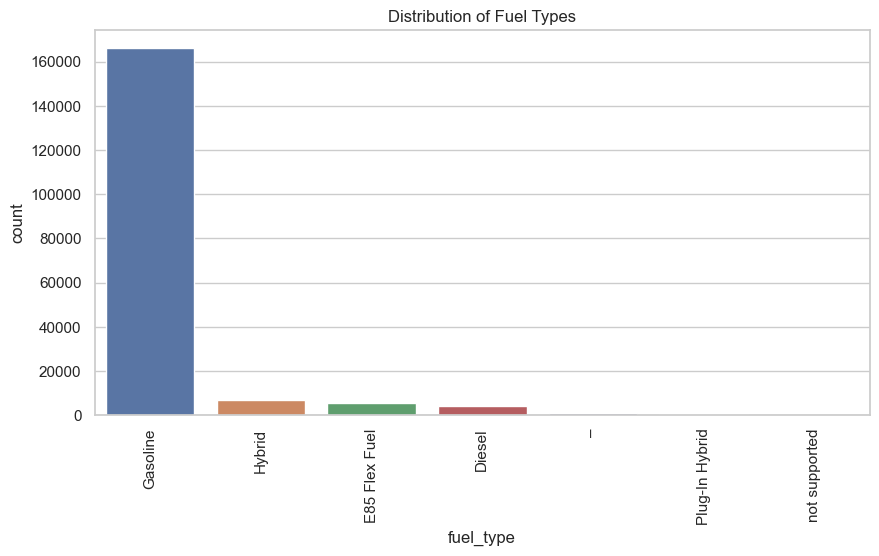

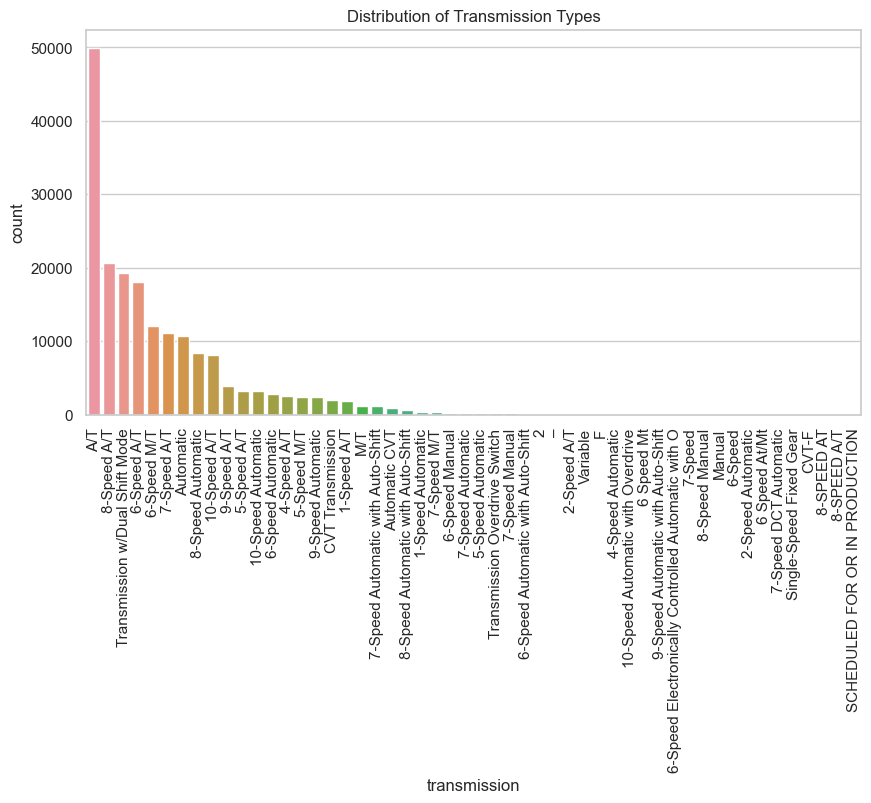

In [2]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Function to create a count plot for categorical variables
def plot_categorical(data, column, title):
    plt.figure(figsize=(10, 5))
    chart = sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Function to create a histogram for numerical variables
def plot_numerical(data, column, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True)
    plt.title(title)
    plt.show()

# Plotting for various attributes
plot_numerical(train_df, 'price', 'Distribution of Prices')
plot_numerical(train_df, 'model_year', 'Distribution of Model Year')
plot_numerical(train_df, 'milage', 'Distribution of Mileage')
plot_categorical(train_df, 'brand', 'Distribution of Brands')
plot_categorical(train_df, 'fuel_type', 'Distribution of Fuel Types')
plot_categorical(train_df, 'transmission', 'Distribution of Transmission Types')


Exploratory Data Analysis (EDA) Summary:
Numeric Features:

model_year: Ranges from 1974 to 2024, which suggests the presence of very old to brand new cars.
milage: Ranges from 100 to 405,000 miles, indicating a wide variance in how much cars have been driven.
price: The distribution is right-skewed with a significant range from $2,000 to about $2.95 million, indicating some extremely high-priced outliers. Most car prices are clustered below $50,000.
The histogram of car prices shows a right-skewed distribution, suggesting the presence of high-value outliers in the dataset. It's essential to consider the impact of these outliers on model performance since they can disproportionately influence the model's error metrics, especially RMSE.

Next Steps:
Data Cleaning: Handle missing values and outliers.
Feature Engineering: Extract potentially useful features and transform data if necessary.
Let's start with data cleaning by identifying and handling missing values across both datasets. We'll also check for any anomalies or inconsistencies in the data that may require attention

In [3]:
# Checking for missing values in both training and test datasets
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

# Display missing values information
missing_train, missing_test


(id                  0
 brand               0
 model               0
 model_year          0
 milage              0
 fuel_type        5083
 engine              0
 transmission        0
 ext_col             0
 int_col             0
 accident         2452
 clean_title     21419
 price               0
 dtype: int64,
 id                  0
 brand               0
 model               0
 model_year          0
 milage              0
 fuel_type        3383
 engine              0
 transmission        0
 ext_col             0
 int_col             0
 accident         1632
 clean_title     14239
 dtype: int64)

Missing Values Analysis:
Training Data:

fuel_type: 5,083 missing values
accident: 2,452 missing values
clean_title: 21,419 missing values
Test Data:

fuel_type: 3,383 missing values
accident: 1,632 missing values
clean_title: 14,239 missing values
Handling Missing Values:
fuel_type: This seems like a crucial variable. Missing values might be imputed using the mode (most common value) since it's a categorical variable.
accident: Also categorical, we can consider imputing missing values with the mode.
clean_title: This variable is important for understanding the legal status of the car. Missing values will be imputed with the most common value.
Let's proceed with the imputation of these missing values. After that, we can perform some feature engineering if necessary before building our predictive models

In [4]:
# Impute missing values with the mode for categorical variables
for column in ['fuel_type', 'accident', 'clean_title']:
    mode_train = train_df[column].mode()[0]
    train_df[column].fillna(mode_train, inplace=True)
    test_df[column].fillna(mode_train, inplace=True)

# Verify imputation by checking for remaining missing values
missing_values_after_imputation = {
    "Training Data": train_df.isnull().sum(),
    "Test Data": test_df.isnull().sum()
}

missing_values_after_imputation


{'Training Data': id              0
 brand           0
 model           0
 model_year      0
 milage          0
 fuel_type       0
 engine          0
 transmission    0
 ext_col         0
 int_col         0
 accident        0
 clean_title     0
 price           0
 dtype: int64,
 'Test Data': id              0
 brand           0
 model           0
 model_year      0
 milage          0
 fuel_type       0
 engine          0
 transmission    0
 ext_col         0
 int_col         0
 accident        0
 clean_title     0
 dtype: int64}

Data Cleaning Results:
All missing values have been successfully imputed in both the training and test datasets.

Next Steps:
Feature Engineering: We'll assess the potential to create new features that could be beneficial for our models.
Model Building: Train several regression models and compare their performance.
For feature engineering, let's consider:

Extracting additional information from the engine column, such as horsepower (HP).
Creating binary features from the accident and clean_title columns for more straightforward model interpretation.
Let's proceed with feature engineering, then move on to model building. 

In [5]:
# Feature Engineering: Extracting horsepower from 'engine' column
train_df['horsepower'] = train_df['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)
test_df['horsepower'] = test_df['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)

# Convert 'accident' and 'clean_title' to binary features
train_df['has_accident'] = (train_df['accident'] != 'None reported').astype(int)
test_df['has_accident'] = (test_df['accident'] != 'None reported').astype(int)

train_df['has_clean_title'] = (train_df['clean_title'] == 'Yes').astype(int)
test_df['has_clean_title'] = (test_df['clean_title'] == 'Yes').astype(int)

# Check the modified dataset and new feature distributions
train_df[['horsepower', 'has_accident', 'has_clean_title']].describe(), train_df.head()


(          horsepower   has_accident  has_clean_title
 count  155274.000000  188533.000000         188533.0
 mean      343.263856       0.220476              1.0
 std       114.734210       0.414569              0.0
 min        70.000000       0.000000              1.0
 25%       263.000000       0.000000              1.0
 50%       329.000000       0.000000              1.0
 75%       416.000000       0.000000              1.0
 max      1020.000000       1.000000              1.0,
    id          brand              model  model_year  milage      fuel_type  \
 0   0           MINI      Cooper S Base        2007  213000       Gasoline   
 1   1        Lincoln              LS V8        2002  143250       Gasoline   
 2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
 3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
 4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   
 
                                     

Feature Engineering Summary:
Horsepower: Extracted successfully from the engine column. However, it appears some entries did not have horsepower data, leading to missing values.
Binary Features: Created binary features has_accident and has_clean_title from accident and clean_title respectively.
Next Steps:
Handle Missing Horsepower: Since not all rows had horsepower information, we will impute these missing values using the mean horsepower for simplicity.
Model Building: We will train several regression models using this enhanced dataset and compare their performance using RMSE.
Let's first handle the missing values for horsepower and then proceed with model training.

In [6]:
# Impute missing horsepower values with the mean horsepower
mean_horsepower = train_df['horsepower'].mean()
train_df['horsepower'].fillna(mean_horsepower, inplace=True)
test_df['horsepower'].fillna(mean_horsepower, inplace=True)

# Confirm no missing values in horsepower
train_df['horsepower'].isnull().sum(), test_df['horsepower'].isnull().sum()


(0, 0)

The missing horsepower values have been successfully imputed in both the training and test datasets. Now, let's move on to building predictive models.

Model Building:
We'll train three different regression models to predict the car prices:

Linear Regression: Basic model for regression tasks.
Random Forest Regressor: A robust model that can handle nonlinear relationships and interactions.
Gradient Boosting Regressor: Another powerful model that often performs well on structured data like this.
We'll split the training data into a training set and a validation set to evaluate the models, and then compare their RMSE scores. Let's begin by preparing the data for modeling.

In [7]:
# Preparing the feature matrix and target vector
X = train_df.drop(['id', 'brand', 'model', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price'], axis=1)
y = train_df['price']

# Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse

results


{'Linear Regression': 70571.405809958,
 'Random Forest': 75324.33591199403,
 'Gradient Boosting': 69248.19570094075}

In [8]:
# Assuming previous data processing steps and model training similar to those provided
# Selecting and encoding features as done before
features = test_df.drop(['brand', 'model', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'], axis=1)
features_encoded = pd.get_dummies(features, drop_first=True)

# Checking if there are any missing columns in the test data after encoding
missing_cols = set(X.columns) - set(features_encoded.columns)
for col in missing_cols:
    features_encoded[col] = 0  # Adding missing dummy variables with 0

# Reorder columns as in the training set
features_encoded = features_encoded[X.columns]

# Load the previously trained Gradient Boosting model and apply it to predict
# For demonstration, creating a new model instance (assuming the original model was similar)
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X, y)  # Train the model on the entire original dataset

# Predicting the prices
predictions = model.predict(features_encoded)
test_df['predicted_price'] = predictions

# Prepare the final dataframe for submission containing only 'id' and 'predicted_price'
submission_df = test_df[['id', 'predicted_price']]

# Save the output to a CSV file
output_file_path = 'submission.csv'
submission_df.to_csv(output_file_path, index=False)

output_file_path


'submission.csv'

In [9]:
# Re-importing necessary libraries and redefining models and configurations
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import numpy as np

# Redefining the hyperparameter grids
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Randomized search setup
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_distributions=param_grid_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
gb_random = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                               param_distributions=param_grid_gb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Advanced model setup
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, max_depth=3, random_state=42)

# Re-load the data
train_df = pd.read_csv('/mnt/data/train.csv')
test_df = pd.read_csv('/mnt/data/test.csv')

# Preprocessing
y = train_df['price']
X = pd.get_dummies(train_df.drop(['price', 'id', 'accident', 'clean_title'], axis=1), drop_first=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting and tuning the models
rf_random.fit(X_train, y_train)
gb_random.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Prediction and RMSE calculation
y_pred_rf = rf_random.best_estimator_.predict(X_val)
y_pred_gb = gb_random.best_estimator_.predict(X_val)
y_pred_xgb = xgb_model.predict(X_val)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))

(rmse_rf, rmse_gb, rmse_xgb)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/train.csv'

In [ ]:
pip install xgboost
